# A one-dimensional diffusion model

Here we develop a one-dimensional model of diffusion.
It assumes a constant diffusivity.
It uses a regular grid.
It has a step function for an initial condition.
It has fixed boundary conditions.

The diffusion equation:

$$ \frac{\partial C}{\partial t} = D\frac{\partial^2 C}{\partial x^2} $$

The discretized version of the diffusion equation we'll solve with out model is:

$$ C^{t+1}_x = C^t_x + {D \Delta t \over \Delta x^2} (C^t_{x+1} - 2C^t_x + C^t_{x-1}) $$


This is the FTCS scheme described in various textbooks. (Also Wikipedia)

We'll use two libraries, NumPy (for arrays) and Matlplotlib (for plots), that aren't a part of the core Python library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Start by setting two fixed model parameters, the diffusivity and the size of the model domain.

In [2]:
D = 100
Lx = 300

Next, set up the model grid with a NumPy array

In [3]:
dx = 0.5
x = np.arange(start=0, stop=Lx, step=dx)
nx = len(x)

Set up the initial conditions for the model.
The concentration `C` is a step function with a high value on the left, a low value on the right, and the step at the center of the domain.

In [4]:
C = np.zeros_like(x)
C_left = 500
C_right = 0
C[x <= Lx//2] = C_left
C[x > Lx//2] = C_right

Plot the initial concentration profile

Text(0.5, 1.0, 'Initial concentration profile')

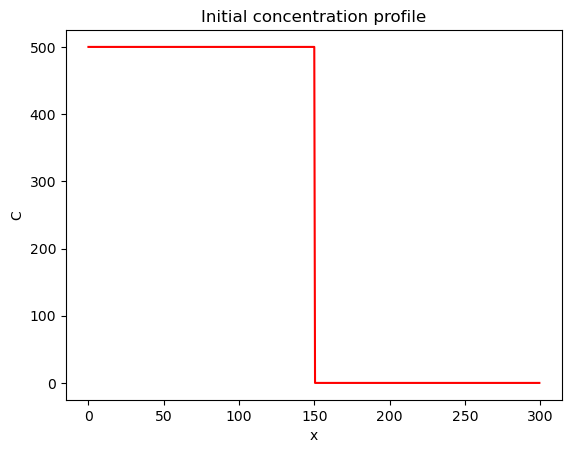

In [5]:
plt.figure()
plt.plot(x, C, "r")
plt.xlabel("x")
plt.ylabel("C")
plt.title("Initial concentration profile")

Set the number of time steps in the model. Calculate a stable time step using a stability criterion.

In [6]:
nt = 5000
dt = 0.5 * dx ** 2 / D

In [7]:
dt

0.00125

Loop over the time steps of the model, solving the diffusion equation using the FTCS scheme described above. Note the use of array operations on the concentration `C`. The boundary conditions remain fixed in each time step.

In [8]:
for t in range(0, nt):
	C[1:-1] += D * dt / dx ** 2 * (C[:-2] - 2*C[1:-1] + C[2:])


Text(0.5, 1.0, 'Final concentration profile')

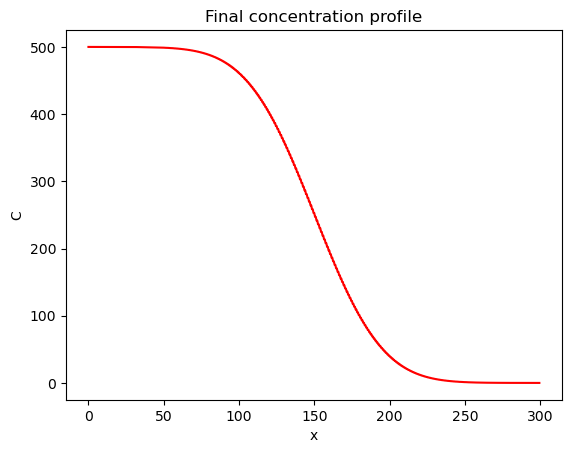

In [9]:
plt.figure()
plt.plot(x, C, "r")
plt.xlabel("x")
plt.ylabel("C")
plt.title("Final concentration profile")


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline

# --- Parameters ---
Lx = 300
D = 100
dx = 0.5
x = np.arange(0, Lx, dx)
nt = 5000  # maximum number of timesteps

# --- Time step (adjustable for stability) ---
dt = 0.5 * dx**2 / D  # safe choice: <= dx^2/(2*D)

# --- Simulation speed options ---
display_interval = 5       # only redraw every 5 steps
n_steps_per_update = 100    # how many timesteps to compute per update

# --- Initial condition ---
C0 = np.zeros_like(x)
C_left, C_right = 500, 0
C0[x <= Lx/2] = C_left

C = C0.copy()
step = 0

# --- Widgets ---
step_button = widgets.Button(description="Step")
play = widgets.Play(interval=100, value=0, min=0, max=nt, step=1)
speed_slider = widgets.IntSlider(description="Speed (ms)", value=100, min=10, max=500, step=10)
last_step_button = widgets.Button(description="Jump to last step")
reset_button = widgets.Button(description="Reset")
out = widgets.Output()

# --- Core functions ---
def render():
    """Update the plot."""
    with out:
        out.clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(6,4))
        ax.plot(x, C, lw=2)
        ax.set_ylim(0, 500)
        ax.set_xlabel("x")
        ax.set_ylabel("C")
        ax.set_title(f"Step {step}")
        plt.show()

def advance(n=1):
    """Advance the diffusion simulation by n steps."""
    global C, step
    for _ in range(n):
        if step >= nt:
            return
        C[1:-1] += D * dt / dx**2 * (C[:-2] - 2*C[1:-1] + C[2:])
        C[0], C[-1] = C_left, C_right
        step += 1

# --- Callbacks ---
def on_step_clicked(b):
    advance(n_steps_per_update)
    if step % display_interval == 0 or step >= nt:
        render()

def on_play_change(change):
    advance(n_steps_per_update)
    if step % display_interval == 0 or step >= nt:
        render()

def on_speed_change(change):
    play.interval = change['new']

def on_last_step_clicked(b):
    advance(nt - step)  # jump directly to last timestep
    render()

def on_reset_clicked(b):
    global C, step
    C[:] = C0
    step = 0
    render()

# --- Connect callbacks ---
step_button.on_click(on_step_clicked)
play.observe(on_play_change, names='value')
speed_slider.observe(on_speed_change, names='value')
last_step_button.on_click(on_last_step_clicked)
reset_button.on_click(on_reset_clicked)

# --- Display UI ---
display(widgets.HBox([step_button, play, last_step_button, reset_button, speed_slider]), out)
render()


Output()